In [1]:
%pylab inline
import numpy as np
from scipy import signal
import os
import csv
from my_logger import log_progress

matplotlib.rcParams['savefig.dpi'] = 120
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle': u'--'})

sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy')
sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy/libbootstrap')

import libbootstrap.spectralmodel as spectralmodel
import scipy
import libbootstrap.spectra_generator as spectra_generator

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Populating the interactive namespace from numpy and matplotlib


In [11]:
data_directory = './inputs/swan_data'
image_directory = './img'
data_file = '0_BLA_14Nov11_1146.csv'
data_file = os.path.join(data_directory, data_file)
rrs = np.genfromtxt(data_file, delimiter=',')



In [12]:
window = 5
poly = 2

start = 5
stop = 2

num_realizations = 20

(0, 0.005)

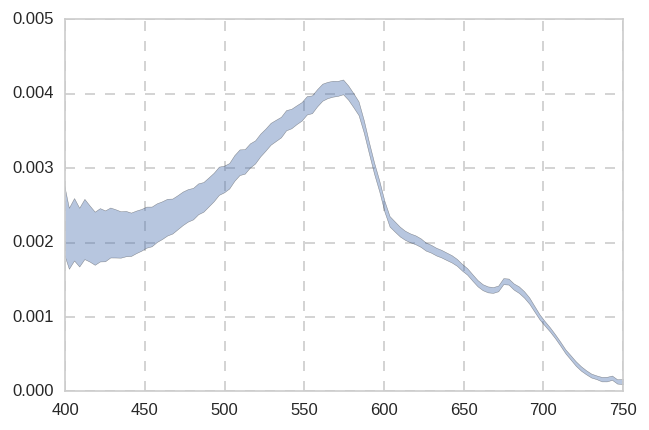

In [13]:
min_rrs = np.amin(rrs[start:stop * -1,:], axis=0)
max_rrs = np.amax(rrs[start:stop * -1,:], axis=0)
mean_rrs = np.median(rrs[start:stop * -1,:], axis=0)

pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=0.4)
pylab.xlim([400, 750])
pylab.ylim([0, 0.005])

## Make the many realisations

'08/13/2016 06:15:03 PM' :: libbootstrappy :: INFO :: Reading :: ./inputs/swan_data/0_BLA_14Nov11_1146.csv


/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 0.005)

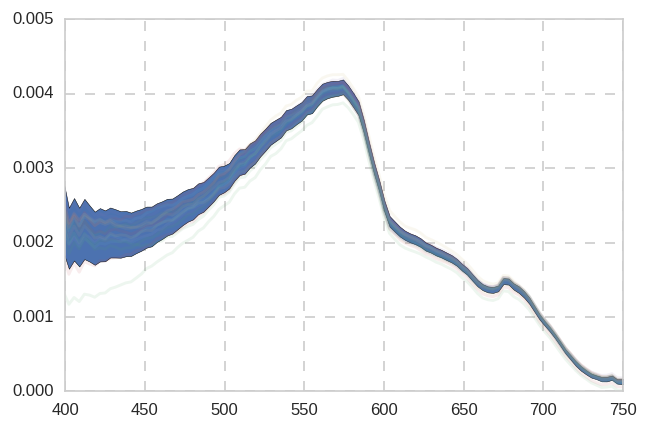

In [14]:
#data_directory = '/home/marrabld/Dropbox/2_PhD/JupyterNoteBooks/swan_data'
#image_directory = '/home/marrabld/Projects/oo2016/notebooks/img'
data_file = os.path.join(data_directory, '0_BLA_14Nov11_1146.csv')

#import libbootstrap.spectralmodel as spectralmodel

sm = spectralmodel.BuildSpectralModel(data_file)

#for row in sm.Rrs:
#    pylab.plot(sm.wave, row)


sm._detrend()
sm._calc_std_delta_Rrs()
sm._calc_normalised_difference_Rrs()
sm._calc_power_spectrum()

#sm._detrend()

#for row in sm.delta_Rrs:
#    pylab.plot(sm.wave, row)
#    pylab.xlim([400, 750])
#    pylab.ylim([0, 0.001])
#        
    

#for i_iter in range(0, sm.Rrs.shape[0] - 1):
#    plot(sm.wave, sm.delta_Rrs[i_iter])

#import scipy
#cf = scipy.ifft(sm.Syy)
#pylab.plot(cf[1:])

#print(cf)

#import libbootstrap.spectra_generator as spectra_generator



sg = spectra_generator.GenerateRealisation(sm, num_realizations)
rn = sg._gen_random_numbers(num_realizations)
N = sg._calc_fft_random_numbers()
Y = sg._calc_rand_powerspectrum()
y = sg._calc_inv_rand_powerspectrum() # lowercase y
y_hat = sg._calc_normalised_difference_inv_rand_powerspectrum()
z = sg._calc_z()
# pinch an Rrs from sm 
#Rrs_1 = Rrs[50, :] #sm.mean_Rrs  This isa spoof!

# Generate realisations from it.
#print(Rrs)
Rrs = sg.gen_Rrs()

for row in Rrs:
    pylab.plot(sm.wave, row, alpha= 0.1)
    
pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=1)
pylab.xlim([400, 750])
pylab.ylim([0, 0.005])


rm: cannot remove ‘./img/*’: No such file or directory


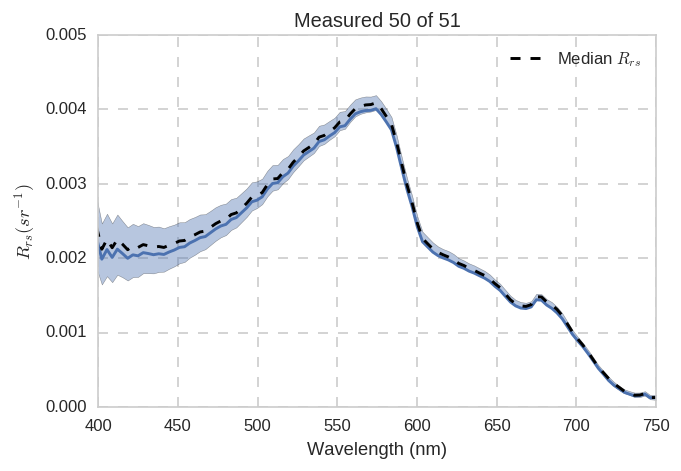

In [15]:
!rm ./img/*
for i_iter in range(start, rrs.shape[0] - stop):
    #hea = signal.savgol_filter(rrs[i_iter], window, poly)
    pylab.cla()
    pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=0.4)

    #pylab.plot(rrs[0,:], min_rrs)
    pylab.plot(rrs[0,:], rrs[i_iter])
    pylab.plot(rrs[0, :], mean_rrs, 'k--', label='Median ' + '$R_{rs}$')
    pylab.title('Measured ' + str(i_iter) + ' of ' + str(rrs.shape[0] - stop))
    #pylab.plot(rrs[0,:], max_rrs)

    pylab.xlim([400, 750])
    pylab.ylim([0, 0.005])
    
    pylab.xlabel('Wavelength (nm)')
    pylab.ylabel('$R_{rs}(sr^{-1})$')
    
    pylab.legend()

    pylab.savefig(os.path.join(image_directory, str(i_iter) + '.jpg'))

In [9]:
!ls -v ./img
!cd img && convert -delay 10 -loop 0 `ls` myimage.gif



5.jpg	11.jpg	17.jpg	23.jpg	29.jpg	35.jpg	41.jpg	47.jpg
6.jpg	12.jpg	18.jpg	24.jpg	30.jpg	36.jpg	42.jpg	48.jpg
7.jpg	13.jpg	19.jpg	25.jpg	31.jpg	37.jpg	43.jpg	49.jpg
8.jpg	14.jpg	20.jpg	26.jpg	32.jpg	38.jpg	44.jpg	50.jpg
9.jpg	15.jpg	21.jpg	27.jpg	33.jpg	39.jpg	45.jpg	myimage.gif
10.jpg	16.jpg	22.jpg	28.jpg	34.jpg	40.jpg	46.jpg


![title]("/home/marrabld/Projects/oo2016/notebooks/img/myimage.gif")

## Next we make a historgram of the inverted values.

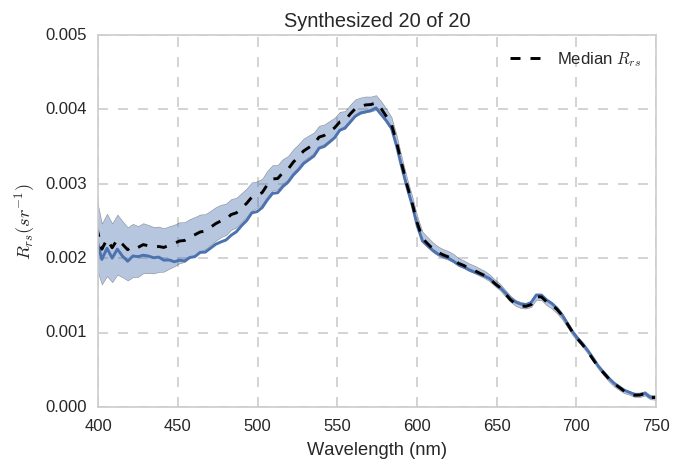

In [32]:
#for i_iter, image_file in log_progress(enumerate(image_files), every=1, size=len(image_files)):
!rm ./img/*
pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=0.4)


for i_iter, row in log_progress(enumerate(Rrs), every=1, size=len(Rrs)):
    pylab.cla()
    pylab.title('Synthesized ' + str(i_iter + 1) + ' of ' + str(Rrs.shape[0]))
    
    pylab.fill_between(rrs[0,:], min_rrs, max_rrs, alpha=0.4)
    
    #print(min_rrs.shape)
    #print(row.shape)
    #print(sm.wave.shape)
    

    #if np.any(row < min_rrs):  # need to make this between our waves of interest. 
    #    #print('found')
    #3    pylab.plot(sm.wave, row, 'r')
    #else:
    #    pylab.plot(sm.wave, row, 'k')
    #    print('nope')
    
    pylab.plot(sm.wave, row)
    pylab.plot(rrs[0, :], mean_rrs, 'k--', label='Median ' + '$R_{rs}$')
    
    pylab.xlim([400, 750])
    pylab.ylim([0, 0.005])

    #pylab.plot(rrs[0, :], mean_rrs, 'k--', label='Median ' + '$R_{rs}$')

    
    pylab.xlabel('Wavelength (nm)')
    pylab.ylabel('$R_{rs}(sr^{-1})$')
    
    pylab.legend()

    pylab.savefig(os.path.join(image_directory, str(i_iter) + '.jpg'))
 
#print(np.real(Rrs[1,:]))
np.savetxt("./inputs/rrs_files/synthRrs.csv", np.real(Rrs), delimiter=",")

In [14]:
!ls -v ./img
!cd img && convert -delay 40 -loop 0 `ls -v` myimage.gif

#<img src=myimage.gif>
#resize 80%

0.jpg  2.jpg  4.jpg  6.jpg  8.jpg  10.jpg  12.jpg  14.jpg  16.jpg  18.jpg
1.jpg  3.jpg  5.jpg  7.jpg  9.jpg  11.jpg  13.jpg  15.jpg  17.jpg  19.jpg


   status: 0
  success: True
     njev: 20
     nfev: 100
 hess_inv: array([[  303.76379459,    30.1898865 ,   703.66726583],
       [   30.1898865 ,     3.49612009,    70.11937219],
       [  703.66726583,    70.11937219,  1636.42245329]])
      fun: 2.7259550730105356e-06
        x: array([ 0.43233817,  0.02919581,  0.16479517])
  message: 'Optimization terminated successfully.'
      jac: array([  1.04030681e-06,   1.60221450e-06,  -5.18071914e-07])


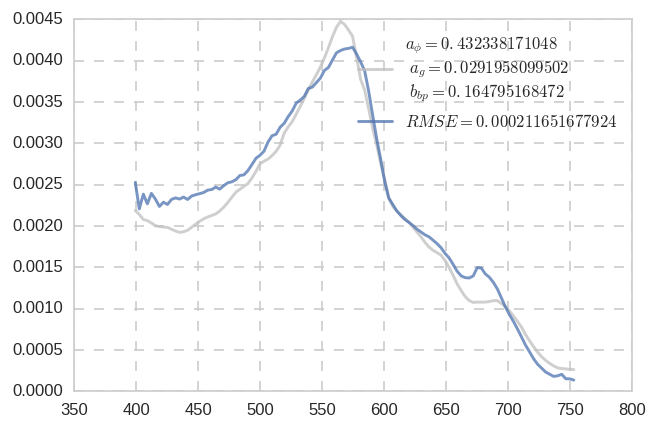

In [27]:
#import libbootstrap.deconv
wavelengths = rrs[0, :]
#data = []

rrs_file = 'synthRrs.csv'
# np.savetxt(rrs_file, np.vstack((sm.wave, np.real(sub_Rrs))), delimiter=',');

#wavelengths = scipy.asarray([410.0, 430.0, 450.0, 470.0, 490.0, 510.0, 530.0, 550.0, 570.0, 590.0, 610.0, 630.0, 650.0, 670.0, 690.0, 710.0, 730.0])
dc = HopeDeep(wavelengths);

#dc.read_rrs_from_file(rrs_file);
dc.rrs = np.genfromtxt('synthRrs.csv', delimiter=',')#[1:2,:]

dc.read_all_iops_from_files();

#print(dc.run(num_iters=1));
#forward = dc.func([P, X, G])
data= dc.run(num_iters=1);

#print(data)

interact(plot_inverted,rrs_num=(1, len(data[0])))


## Plot Inverted Data


In [24]:
def plot_inverted(rrs_num=1):
    
    
    _label = '$a_\phi = ' + str(data[rrs_num].x[0]) + '$' + \
    '\n $a_g = ' + str(data[rrs_num].x[1]) + '$' + \
    '\n $b_{bp} = ' + str(data[rrs_num].x[2]) + '$'

    model_rrs = dc.func(data[rrs_num].x)
    measured_rrs = dc.rrs[0, :]

    pylab.plot(wavelengths, model_rrs , color= '0.75', alpha = 0.75, label=_label)

    rms = rmse(model_rrs, measured_rrs)

    pylab.plot(wavelengths, measured_rrs, alpha = 0.75, label='$RMSE = ' + str(rms) + '$')

    pylab.legend()
    print(data[rrs_num])

    pylab.show()

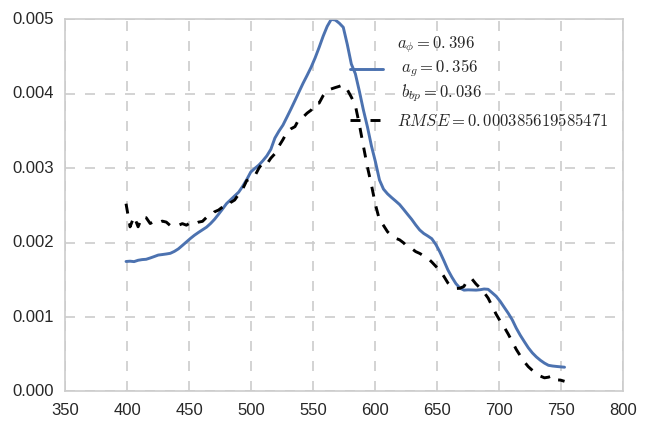

In [29]:
interact(plot_fwd, i_rrs=(0,rrs.shape[0] -1),  G=(0.001,1, 0.001), num_iters=(1, 100), P=(0.001, 1, 0.001), X=(0.00, 0.08, 0.001))

In [28]:
def plot_fwd(i_rrs=5, X=0.001, G=0.001, P=0.001):
    rrs = np.genfromtxt('./inputs/rrs_files/synthRrs.csv', delimiter=',')
    
    _label = '$a_\phi = ' + str(P) + '$' + \
    '\n $a_g = ' + str(G) + '$' + \
    '\n $b_{bp} = ' + str(X) + '$'
    
    
    
    #for i_iter in np.linspace(0, 0.1, num_iters):
    forward = dc.func([P, X, G])  # P, X, -d-, G [0.01 0.1 0.0 0.1]
    
    rms = rmse(rrs[i_rrs], forward)
    plot(wavelengths, forward, label=_label)
    
    plot(wavelengths, rrs[i_rrs], 'k--', label='$RMSE = ' + str(rms) + '$')
    
    pylab.legend()
    
#pylab.ylim([0, 10])

In [18]:
class BioOpticalParameters():
    def __init__(self, wavelengths):
        self.wavelengths = scipy.asarray([wavelengths])
        # self.b_bp = None #scipy.asarray([])
        self.b_bm = None
        self.a_cdom = None  # scipy.asarray([])
        self.a_phi = None  # scipy.asarray([])
        self.a_water = None  # scipy.asarray([])
        self.b_bwater = None  # scipy.asarray([])

        self.b_b = None  # scipy.asarray([])
        self.b_bphi = None
        # self.b = None #scipy.asarray([])
        self.a = None  #scipy.asarray([])
        self.c = None  #scipy.asarray([])
        self.rrs = None  #scipy.asarray([])


    def build_bbp(self, x, y, wave_const=550.0):
        r"""
        Builds the particle backscattering function  :math:`X(\frac{550}{\lambda})^Y`
        param: x function coefficient
        param: y order of the power function
        param: waveConst wave constant Default 550 nm
        retval: null
        """
        #.info('Building b_bp spectra')
        self.b_bp = x * (wave_const / self.wavelengths) ** y

    def build_a_cdom(self, g, s, wave_const=400.0):
        r"""
        Builds the CDOM absorption function :: :math:`G \exp (-S(\lambda - 400))`
        param: g function coefficient
        param: s slope factor
        param: wave constant
        retval null
        """
        #.info('building CDOM absorption')
        self.a_cdom = g * scipy.exp(-s * (self.wavelengths - wave_const))

    def read_aphi_from_file(self, file_name):
        """

        """
        #.info('Reading ahpi absorption')
        try:
            self.a_phi = self._read_iop_from_file(file_name)
            if globs.debug:
                print(self.a_phi)
        except:
            print('Problem reading file :: ' + file_name)
            raise
            self.a_phi = -1

        return self.a_phi

    def read_b_bphi_from_file(self, file_name):
        """

        """
        #.info('Reading ahpi absorption')
        try:
            self.b_bphi = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.b_bphi = -1

        return self.b_bphi

    def read_b_from_file(self, file_name):
        """

        """
        #.info('Reading total scattering')
        try:
            self.b = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.b = -1

        return self.b

    def read_bb_from_file(self, file_name):
        """

        """
        #.info('Reading backscattering')
        try:
            self.bb = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.bb = -1

        return self.bb

    def read_bbm_from_file(self, file_name):
        """

        """
        #.info('Reading particle backscattering')
        try:
            self.b_bm = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.b_bm = -1

        return self.b_bm

    def read_bbd_from_file(self, file_name):
        """

        """
        #.info('Reading particle backscattering')
        try:
            self.b_bd = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.b_bd = -1

        return self.b_bd

    def read_a_from_file(self, file_name):
        """

        """
        #.info('Reading total absorption')
        try:
            self.a = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.a = -1

        return self.a

    def read_am_from_file(self, file_name):
        """

        """
        #.info('Reading total absorption')
        try:
            self.am = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.am = -1

        return self.am

    def read_ad_from_file(self, file_name):
        """

        """
        #.info('Reading total absorption')
        try:
            self.ad = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.ad = -1

        return self.ad

    def read_ag_from_file(self, file_name):
        """

        """
        #.info('Reading total absorption')
        try:
            self.ag = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.ag = -1

        return self.ag

    def scale_aphi(self, scale_paraemter):
        """

        """
        #.info('Scaling a_phi by :: ' + str(scale_paraemter))
        try:
            self.a_phi = self.a_phi * scale_paraemter
        except:
            #.exception("Can't scale a_phi, check that it has been defined ")
            pass

    def scale_bphi(self, scale_paraemter):
        """

        """
        #.info('Scaling b_phi by :: ' + str(scale_paraemter))
        try:
            self.b_bphi = self.b_bphi * scale_paraemter
        except:
            #.exception("Can't scale b_phi, check that it has been defined ")
            pass

    def read_pure_water_absorption_from_file(self, file_name):
        """

        """
        #.info('Reading water absorption from file')
        try:
            self.a_water = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            ('Problem reading file :: ' + file_name)
            self.a_phi = -1

        return self.a_water

    def read_pure_water_scattering_from_file(self, file_name, scattering_factor=0.02):
        """

        """
        #.info('Reading water scattering from file and multipy by ' + str(scattering_factor))
        try:
            self.b_bwater = self._read_iop_from_file(file_name) * scattering_factor
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.b_bwater = -1

        return self.b_bwater

    def read_sub_surface_reflectance_from_file(self, file_name):
        """

        """
        #.info('Reading subsurface reflectance from file')
        try:
            self.rrs = self._read_iop_from_file(file_name)
        except:
            #.exception('Problem reading file :: ' + file_name)
            self.rrs = -1

        return self.rrs


    def _read_iop_from_file(self, file_name):
        """
        Generic IOP reader that interpolates the iop to the common wavelengths defined in the constructor

        returns: interpolated iop
        """
        #.info('Reading :: ' + file_name + ' :: and interpolating to ' + str(self.wavelengths))

        if os.path.isfile(file_name):
            iop_reader = csv.reader(open(file_name), delimiter=',', quotechar='"')
            wave = scipy.float32(iop_reader.next())
            iop = scipy.zeros_like(wave)
            for row in iop_reader:
                iop = scipy.vstack((iop, row))

            iop = scipy.float32(iop[1:, :])  # drop the first row of zeros
        else:
            #.exception('Problem reading file :: ' + file_name)
            raise IOError

        try:
            int_iop = scipy.zeros((iop.shape[0], self.wavelengths.shape[1]))
            for i_iter in range(0, iop.shape[0]):
                # r = scipy.interp(self.wavelengths[0, :], wave, iop[i_iter, :])
                int_iop[i_iter, :] = scipy.interp(self.wavelengths, wave, iop[i_iter, :])
            return int_iop
        except IOError:
            #.exception('Error interpolating IOP to common wavelength')
            return -1

    # def write_b_to_file(self, file_name):
    # self.write_iop_to_file(self.wavelengths, self.b, file_name)

    def write_c_to_file(self, file_name):
        self.write_iop_to_file(self.wavelengths, self.c, file_name)

    def write_a_to_file(self, file_name):
        self.write_iop_to_file(self.wavelengths, self.a, file_name)

    def write_bb_to_file(self, file_name):
        self.write_iop_to_file(self.wavelengths, self.b_b, file_name)

    def write_iop_to_file(self, wavelengths, iop, file_name):
        #.info('Writing :: ' + file_name)
        f = open(file_name, 'w')
        for i, wave in enumerate(scipy.nditer(wavelengths)):
            if i < self.wavelengths.shape[1] - 1:
                f.write(str(wave) + ',')
            else:
                f.write(str(wave))
        f.write('\n')

        for i, _iop in enumerate(scipy.nditer(iop)):
            if i < iop.shape[1] - 1:
                f.write(str(_iop) + ',')
            else:
                f.write(str(_iop))

    def build_bb(self):
        #.info('Building bb spectra')
        self.b_b = self.b_bphi + self.b_bm + self.b_bd + self.b_bwater
        #self.b_b = self.b_b * 0.2
        #phi * self.bb_phi + m * self.bb_m + d * self.bb_d + self.bw

    # def build_b(self, scattering_fraction=0.2):
    #     #.info('Building b with scattering fraction of :: ' + str(scattering_fraction))
    #     self.b = self.b_b / scattering_fraction

    def build_a(self):
        #.info('Building total absorption')
        self.a = self.a_water + self.ag + self.a_phi + self.ad + self.am

    def build_c(self):
        #.info('Building total attenuation C')
        self.c = self.a + self.b

    def build_all_iop(self):
        #.info('Building all b and c from IOPs')

        self.build_a()
        self.build_bb()
        #self.build_b()
        #self.build_c()

In [19]:
class OpticalModel():
    def __init__(self, wavelengths):
        self.bb = None
        self.a = None
        self.bio_optical_parameters = BioOpticalParameters(wavelengths)
        self.aw = None
        self.bw = None
        self.rrs = None
        self.b_bphi = None
        self.bb_m = None
        self.bb_d = None
        self.a_phi = None
        self.a_m = None
        self.a_d = None
        self.a_g = None
        self.b_bw = None

    def read_bb_from_file(self, filename='../notebooks/inputs/iop_files/bb.csv'):
        self.bb = self.bio_optical_parameters.read_bb_from_file(filename)

    def read_a_from_file(self, filename='../notebooks/inputs/iop_files/a.csv'):
        self.a = self.bio_optical_parameters.read_a_from_file(filename)

    def read_bw_from_file(self, filename='../notebooks/inputs/iop_files/b_water.csv'):
        self.b_bw = self.bio_optical_parameters.read_pure_water_scattering_from_file(filename) * 0.5

    def read_aw_from_file(self, filename='../notebooks/inputs/iop_files/a_water.csv'):
        self.aw = self.bio_optical_parameters.read_pure_water_absorption_from_file(filename)

    def read_rrs_from_file(self, filename='../notebooks/inputs/iop_files/rrs.csv'):
        self.rrs = self.bio_optical_parameters.read_sub_surface_reflectance_from_file(filename)

    def read_aphi_from_file(self, filename='../notebooks/inputs/iop_files/aphi.csv'):
        self.a_phi = self.bio_optical_parameters.read_aphi_from_file(filename)

    def read_bbm_from_file(self, filename='../notebooks/inputs/iop_files/bbm.csv'):
        self.b_bm = self.bio_optical_parameters.read_bbm_from_file(filename)

    def read_bbd_from_file(self, filename='../notebooks/inputs/iop_files/bbd.csv'):
        self.b_bd = self.bio_optical_parameters.read_bbd_from_file(filename)

    def read_am_from_file(self, filename='../notebooks/inputs/iop_files/am.csv'):
        self.a_m = self.bio_optical_parameters.read_am_from_file(filename)

    def read_ad_from_file(self, filename='../notebooks/inputs/iop_files/ad.csv'):
        self.a_d = self.bio_optical_parameters.read_ad_from_file(filename)

    def read_ag_from_file(self, filename='../notebooks/inputs/iop_files/ag.csv'):
        self.a_g = self.bio_optical_parameters.read_ag_from_file(filename)

    def read_bbphi_from_file(self, filename='../notebooks/inputs/iop_files/b_bphi.csv'):
        self.b_bphi = self.bio_optical_parameters.read_b_bphi_from_file(filename)

    def read_all_iops_from_files(self, filelist=['../notebooks/inputs/iop_files/bb.csv',
                                                 '../notebooks/inputs/iop_files/a.csv',
                                                 '../notebooks/inputs/iop_files/b_water.csv',
                                                 '../notebooks/inputs/iop_files/a_water.csv',
                                                 '../notebooks/inputs/iop_files/a_phi.csv',
                                                 '../notebooks/inputs/iop_files/bbm.csv',
                                                 '../notebooks/inputs/iop_files/bbd.csv',
                                                 '../notebooks/inputs/iop_files/am.csv',
                                                 '../notebooks/inputs/iop_files/ad.csv',
                                                 '../notebooks/inputs/iop_files/ag.csv',
                                                 '../notebooks/inputs/iop_files/b_bphi.csv']):  #                                                 '../inputs/iop_files/rrs.csv',
        self.read_bb_from_file(filename=filelist[0])
        self.read_a_from_file(filename=filelist[1])
        self.read_bw_from_file(filename=filelist[2])
        self.read_aw_from_file(filename=filelist[3])
        #self.read_rrs_from_file(filename=filelist[4])
        self.read_aphi_from_file(filename=filelist[4])
        self.read_bbm_from_file(filename=filelist[5])
        self.read_bbd_from_file(filename=filelist[6])
        self.read_am_from_file(filename=filelist[7])
        self.read_ad_from_file(filename=filelist[8])
        self.read_ag_from_file(filename=filelist[9])
        self.read_bbphi_from_file(filename=filelist[10])
        if globs.debug:
            print(filelist)

    def func(self, params):
        phi = params[0]
        m = params[1]
        d = params[2]
        g = params[3]

        Bb = (phi * self.b_bphi + m * self.b_bm + d * self.b_bd + self.b_bw)
        A = (phi * self.a_phi + m * self.a_m + d * self.a_d + g * self.a_g + self.aw)

        return scipy.squeeze(Bb / A)


    def opt_func(self, args, *params):
        ydata = params[0]
        return_vals = self.func(args)
        res = scipy.squeeze(ydata - return_vals)
        return (res ** 2).sum()

        # return scipy.squeeze(ydata - return_vals)  #  Residual

    def solve_opt_func(self, ydata, **kwargs):
        res_data = scipy.zeros((ydata.shape[0]))
        phi = kwargs.get('phi', 0.4)
        m = kwargs.get('m', 0.03)
        #d = kwargs.get('d', 0.01)
        g = kwargs.get('g', 0.09)
        finish_opt = kwargs.get('finish_opt', True)

        P0 = [phi, m, g]
        #opt_data = scipy.zeros((ydata.shape[0], len(P0)))
        opt_data = []

        #leastsq(func, x0, args, Dfun, full_output, col_deriv, ftol, xtol, gtol, maxfev, epsfcn, factor, diag)

        for i_iter in range(0, ydata.shape[0]):
            #opt_data[i_iter, :], cov_x = scipy.optimize.leastsq(self.opt_func, P0, args=ydata[i_iter, :], full_output=0)
            #tmp = scipy.optimize.leastsq(self.opt_func, P0, args=ydata[i_iter, :], full_output=0)
            #_args = tuple(map(tuple, ydata[i_iter, :]))
            #_args = tuple([tuple(row) for row in ydata])
            _args = tuple(ydata[i_iter, :])
            #opt_data[i_iter, :], cov_x = scipy.optimize.minimize(self.opt_func, P0, args=_args)
            tmp = scipy.optimize.minimize(self.opt_func, P0, args=_args)
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='Nelder-Mead')
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='Powell')
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='CG')
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='BFGS')
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='Newton-CG') jac needed
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='L-BFGS-B')
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='COBYLA')
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='SLSQP')
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='dogleg') # jac required
            #opt_data = scipy.optimize.minimize(self.opt_func, P0, args=_args, method='trust-ncg') # jac required

            ##.debug('optimising row :: ' + str(i_iter))

            #if finish_opt:
            #    tmp = scipy.optimize.brute(self.opt_func, ranges=((0., 1.), (0., 1.), (0., 1.), (0., 1.)), Ns=5, full_output=True, args=_args, finish=scipy.optimize.fmin)
            #else:
            #    tmp = scipy.optimize.brute(self.opt_func, ranges=((0., 1.), (0., 1.), (0., 1.), (0., 1.)), Ns=5, full_output=True, args=_args, finish=None)
            
            opt_data.append(tmp)
            #print(tmp)
            #res_data[i_iter] = tmp.fun


        return opt_data #, res_data

    def run(self, outputfile='results.csv', **kwargs):
        # --------------------------------------------------#
        #  Todo : check to see if the inputs are not none
        #--------------------------------------------------#
        import inspect
        this_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))

        data_list = []
        residual_list = []

        num_iters = kwargs.get('num_iters', 1)
        
        print(self.rrs)

        data = self.solve_opt_func(self.rrs, **kwargs)

        #data_list.append(data)
        #residual_list.append(data[1])
        #idx = scipy.argmin(res_data)



        return data #[idx, :], scipy.std(data, 0), data  # todo return the std as well


class McKeeModel(OpticalModel):
    def __init__(self, wavelengths):
        OpticalModel.__init__(self, wavelengths)

    def func(self, params):
        phi = params[0]
        m = params[1]
        d = params[2]
        g = params[3]

        Bb = (phi * self.b_bphi + m * self.b_bm + d * self.b_bd + self.bw)
        A = (phi * self.a_phi + m * self.a_m + d * self.a_d + g * self.a_g + self.aw)

        return scipy.squeeze(Bb / A)


    def opt_func(self, params, ydata):
        return_vals = self.func(params)

        return scipy.squeeze(ydata - return_vals)  # Residual


class McKeeModelCase2(OpticalModel):
    def __init__(self, wavelengths):
        OpticalModel.__init__(self, wavelengths)

    def func(self, params):
        phi = params[0]
        m = params[1]
        d = params[2]
        g = params[3]

        Bb = (phi * self.b_bphi + m * self.b_bm + d * self.b_bd + self.b_bw)
        A = (phi * self.a_phi + m * self.a_m + d * self.a_d + g * self.a_g + self.aw)

        rrs = Bb / (A + Bb)
        Rrs = (0.5 * rrs) / (1. - (1.5 * rrs))

        return scipy.squeeze(Rrs)


    def opt_func(self, args, *params):
        ydata = params
        return_vals = self.func(args)
        res = scipy.squeeze(ydata - return_vals)
        return (res ** 2).sum()

        # return scipy.squeeze(ydata - return_vals)  # Residual


class BCDeep(OpticalModel):
    def __init__(self, wavelengths):
        OpticalModel.__init__(self, wavelengths)

    def func(self, params):
        G0_w = 0.0624
        G1_w = 0.0524
        G0_p = 0.0434
        G1_p = 0.1406
        y = 1.0
        s = 0.014

        phi = params[0]
        m = params[1]
        #d = params[2]
        g = params[2]

        b_bp = m * (400.0 / self.bio_optical_parameters.wavelengths) ** y
        a_cdom = g * scipy.exp(-s * (self.bio_optical_parameters.wavelengths - 440.0))

        #Bb = (phi * self.b_bphi + m * self.b_bm + d * self.b_bd + self.b_bw)
        Bb = (b_bp + self.b_bw)
        A = (phi * self.a_phi + a_cdom + self.aw)

        k = A + Bb

        Rrs = (G0_w + G1_w * (self.b_bw / k)) * self.b_bw / k + (G0_p + G1_p * (self.b_bm / k)) * (self.b_bm / k)

        return scipy.squeeze(Rrs)


    def opt_func(self, args, *params):
        ydata = params
        return_vals = self.func(args)
        res = scipy.squeeze(ydata - return_vals)
        return (res ** 2).sum()

class HopeDeep(OpticalModel):
    def __init__(self, wavelengths):
        OpticalModel.__init__(self, wavelengths)

    def func(self, params):
        g0 = 0.084
        g1 = 0.17
        #g0 = 0.0949
        #g1 = 0.0794
        y = 1.0
        s = 0.014

        phi = params[0]
        m = params[1]
        #d = params[2]
        g = params[2]

        b_bp = m * (400.0 / self.bio_optical_parameters.wavelengths) ** y
        a_cdom = g * scipy.exp(-s * (self.bio_optical_parameters.wavelengths - 440.0))

        b_b = (b_bp + self.b_bw)
        a = (phi * self.a_phi + a_cdom + self.aw)

        u = b_b / (a + b_b)
        r_rs_dp = (g0 + g1 * u) * u

        Rrs = 0.5 * r_rs_dp / (1.0 - 1.5 * r_rs_dp)
        #Rrs = 0.5 * r_rs_dp / (0.52 + 1.7 * r_rs_dp)

        return scipy.squeeze(Rrs)


    def opt_func(self, args, *params):
        ydata = params
        return_vals = self.func(args)
        res = scipy.squeeze(ydata - return_vals)
        return (res ** 2).sum()

class QAA(OpticalModel):
    def __init__(self, wavelengths):
        OpticalModel.__init__(self, wavelengths)

    def func(self, dummy=0):
        g0 = 0.0949
        g1 = 0.0794


        idx_410 = abs(self.bio_optical_parameters.wavelengths - 410.0).argmin()
        idx_440 = abs(self.bio_optical_parameters.wavelengths - 440.0).argmin()
        idx_555 = abs(self.bio_optical_parameters.wavelengths - 555.0).argmin()

        rrs = scipy.squeeze(self.rrs / (0.52 + 1.7 * self.rrs))
        u = -g0 + (g0 ** 2 + 4.0 * g1 * rrs) ** 0.5 / (2 * g1)
        p = scipy.log(rrs[idx_440] / rrs[idx_555])
        a_440 = scipy.exp(-2.0 - 1.4 * p + 0.2 * p ** 2)
        a_555 = 0.0596 + 0.2 * (a_440 - 0.01)
        b_bp_555 = (u[idx_555] * a_555) / (1 - u[idx_555]) - scipy.squeeze(self.b_bw)[idx_555]
        y = 2.2 * (1 - 1.2 * scipy.exp(-0.9 * ((rrs[idx_440]) / (rrs[idx_555]))))
        b_bp = b_bp_555 * (555.0 / self.bio_optical_parameters.wavelengths) ** y
        a = (1 - u) * (self.b_bw + b_bp) / (u)
        gamma = 0.71 + 0.06 / (0.8 + (rrs[idx_440] / rrs[idx_555]))
        epsilon = scipy.exp(0.015 * (440.0 - 410.0))
        a_g_440 = ((scipy.squeeze(a)[idx_410]) / (epsilon - gamma)) - ((scipy.squeeze(self.aw)[idx_410] - gamma * scipy.squeeze(self.aw)[idx_410]) / (epsilon - gamma))
        a_phi_440 = a_440 - a_g_440 - scipy.squeeze(self.aw)[idx_440]

        return [a_phi_440, b_bp_555, 0.0, a_g_440]


    def opt_func(self, args, *params):
        ydata = params
        return_vals = self.func(args)
        res = scipy.squeeze(ydata - return_vals)
        return (res ** 2).sum()

    def run(self, outputfile='results.csv', **kwargs):
        """

        :param outputfile:
        :param kwargs:
        :return:
        """
        return self.func()

In [20]:
class globs:
    debug = False

In [21]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [4]:
global remote_file 
remote_file = ''
#remote_file = r"https://gist.githubusercontent.com/marrabld/40cf8a33eaefdc8219ce84616ad8b142/raw/d29a4c9e6837513dfd5d692da8e27d2d9fbfdece/wget_test_get_rrs"

In [7]:
btn = widgets.Button(description='Click Me', button_style='primary')
btn.on_click(grab_file)
display(btn)
#btn.button_style.center()

https://gist.githubusercontent.com/marrabld/40cf8a33eaefdc8219ce84616ad8b142/raw/d29a4c9e6837513dfd5d692da8e27d2d9fbfdece/wget_test_get_rrs
--2016-08-13 22:54:33--  https://gist.githubusercontent.com/marrabld/40cf8a33eaefdc8219ce84616ad8b142/raw/d29a4c9e6837513dfd5d692da8e27d2d9fbfdece/wget_test_get_rrs
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.100.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.100.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54999 (54K) [text/plain]
Saving to: 'rrs.csv’

rrs.csv             100%[=====================>]  53.71K   247KB/s   in 0.2s   

2016-08-13 22:54:34 (247 KB/s) - 'rrs.csv’ saved [54999/54999]



In [26]:
def grab_file(b):
    remote_file = txt.value
    print("Grabbing :: " + remote_file)
    !wget "$remote_file" -O 'inputs/rrs_files/rrs.csv'

In [25]:
#widgets.Dropdown({'key':'value'})

In [27]:
heading = widgets.HTML(
    value="<center><h2>Enter Remote URL to .CSV file</h2></center>"
)
display(heading)

txt = widgets.Text(description='Remote URL')
txt.width = "800px"

#print(remote_file)
display(txt)

#remote_file = txt.value()

btn = widgets.Button(description='Pull File', button_style='primary')
btn.on_click(grab_file)
#btn.on_click(print_val)
display(btn)

Grabbing :: https://gist.githubusercontent.com/marrabld/40cf8a33eaefdc8219ce84616ad8b142/raw/d29a4c9e6837513dfd5d692da8e27d2d9fbfdece/wget_test_get_rrs
--2016-08-13 23:35:13--  https://gist.githubusercontent.com/marrabld/40cf8a33eaefdc8219ce84616ad8b142/raw/d29a4c9e6837513dfd5d692da8e27d2d9fbfdece/wget_test_get_rrs
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.100.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.100.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54999 (54K) [text/plain]
Saving to: 'inputs/rrs_files/rrs.csv’

inputs/rrs_files/rr 100%[=====================>]  53.71K   244KB/s   in 0.2s   

2016-08-13 23:35:14 (244 KB/s) - 'inputs/rrs_files/rrs.csv’ saved [54999/54999]



In [16]:
def print_val(b):
    print(txt.value)

In [25]:
widgets.VBox([widgets.Label('A too long description'), widgets.IntSlider()])